## THIS TECHNIQUE WORKS ONLY IN NORMAL DISTRIBUTION

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
df = pd.read_csv('https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day42-outlier-removal-using-zscore/placement.csv')
df.head(5)

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [19]:
df.isnull().sum()

cgpa                    0
placement_exam_marks    0
placed                  0
dtype: int64

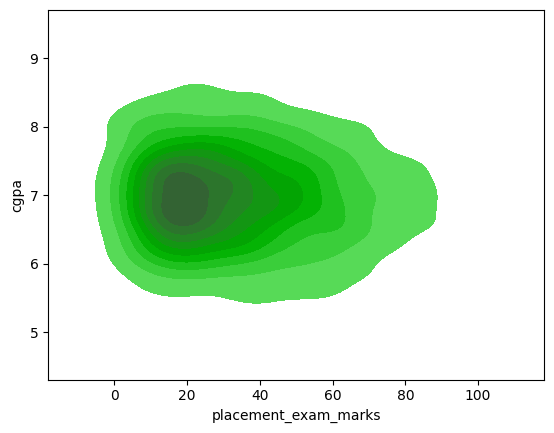

In [20]:
sns.kdeplot(x=df['placement_exam_marks'], y=df['cgpa'],bw_method='silverman',color = 'g' , fill=True)
plt.show()


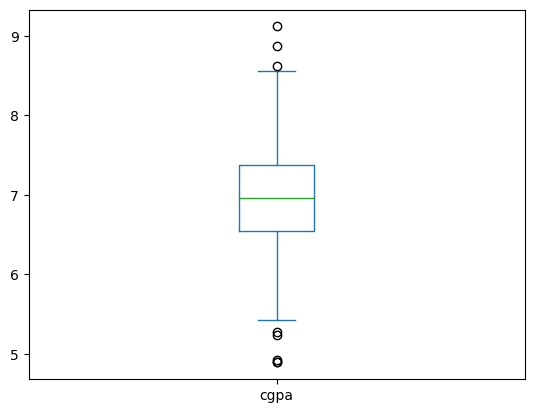

In [21]:
df['cgpa'].plot(kind='box')
plt.show()

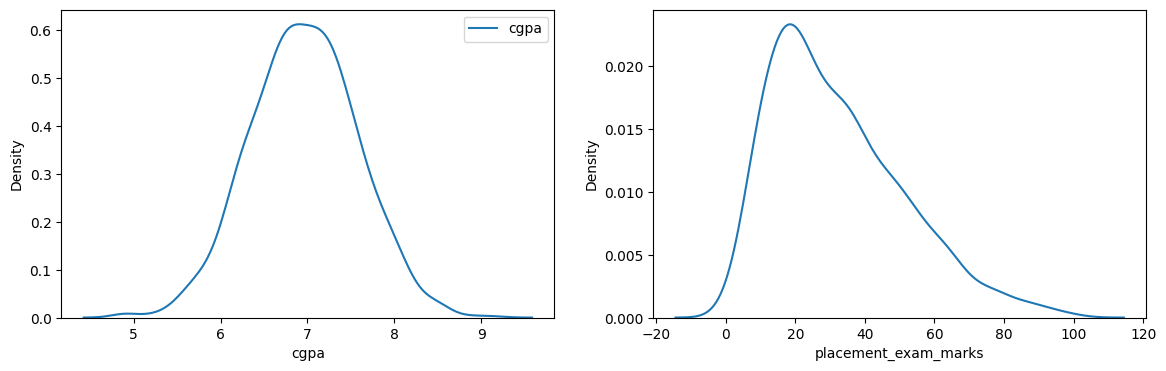

In [22]:
plt.figure(figsize = (14,4))
plt.subplot(122)
sns.kdeplot(df['placement_exam_marks'] , label = 'placement_exam_marks')
plt.subplot(121)
sns.kdeplot(df['cgpa'] , label = 'cgpa')
plt.legend()
plt.show()


In [23]:
np.round(df['cgpa'].describe() , 1)

count    1000.0
mean        7.0
std         0.6
min         4.9
25%         6.6
50%         7.0
75%         7.4
max         9.1
Name: cgpa, dtype: float64

# Trimming Method 1

In [24]:
#Finding boundary values
print('Highest allowed', df['cgpa'].mean() + 3*df['cgpa'].std())
print('Lowest allowed' , df['cgpa'].mean() - 3*df['cgpa'].std())


Highest allowed 8.808933625397168
Lowest allowed 5.113546374602832


In [25]:
# Finding Outliers

df[(df['cgpa'] > 8.80)|(df['cgpa'] < 5.11)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


## and for single boolean values and & for Series of boolean values.

In [26]:
new_df1 = df[(df['cgpa'] < 8.80) & (df['cgpa'] > 5.11)]
new_df1.head(10)


,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
5,7.30,23.0,1
6,6.69,11.0,0
7,7.12,39.0,1
8,6.45,38.0,0
9,7.75,94.0,1


# Trimming Method 2

In [27]:
df['z-score'] = (df['cgpa'] - df['cgpa'].mean())/df['cgpa'].std()

In [28]:
df[(df['z-score'] > 3) | (df['z-score'] < -3)]

,cgpa,placement_exam_marks,placed,z-score
485,4.92,44.0,1,-3.314251
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [29]:
new_df2 = df[(df['z-score'] < 3) & (df['z-score'] > -3)]
new_df2

,cgpa,placement_exam_marks,placed,z-score
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
991,7.04,57.0,0,0.127878
992,6.26,12.0,0,-1.138565
993,6.73,21.0,1,-0.375452
994,6.48,63.0,0,-0.781363


# Capping

In [30]:
upper_limit = df['cgpa'].mean() + 3* df['cgpa'].std()
lower_limit = df['cgpa'].mean() - 3* df['cgpa'].std()

In [31]:
df['cgpa'] = np.where(
    df['cgpa'] > upper_limit,
    upper_limit,
    np.where(       
        df['cgpa'] < lower_limit,
        lower_limit,
        df['cgpa']  
    )
)

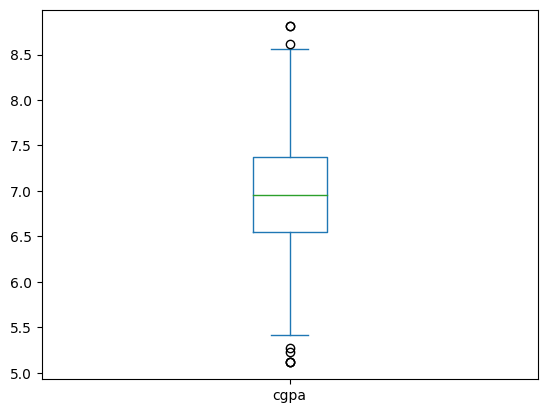

In [32]:
df['cgpa'].plot(kind='box')
plt.show()

In [33]:
df['cgpa'].describe()

count    1000.000000
mean        6.961499
std         0.612688
min         5.113546
25%         6.550000
50%         6.960000
75%         7.370000
max         8.808934
Name: cgpa, dtype: float64